Montagem de dataframe

In [1]:
import pandas as pd

In [2]:
base = pd.read_csv('plano_saude2.csv')

In [3]:
x = base.iloc[:, 0:1].values
y = base.iloc[:, 1:2].values

Pré-processamento dos dados

In [4]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

Regressão Rede neural

In [5]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor()
regressor.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [6]:
regressor.score(x, y)

0.9195705584691506

In [7]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Custo')

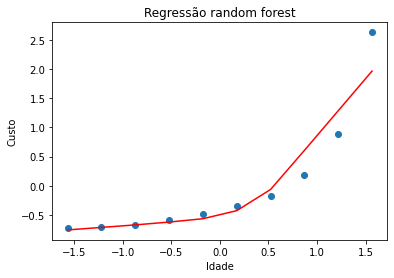

In [8]:
plt.scatter(x, y)
plt.plot(x, regressor.predict(x), color='red')
plt.title('Regressão random forest')
plt.xlabel('Idade')
plt.ylabel('Custo')

In [9]:
previsao = scaler_y.inverse_transform(regressor.predict(scaler_x.transform(np.array(40).reshape(1, -1))))
previsao

array([1030.38305908])

In [10]:
previsao = scaler_y.inverse_transform(regressor.predict(x))
x = scaler_x.inverse_transform(x)
y = scaler_y.inverse_transform(y)

Text(0, 0.5, 'Custo')

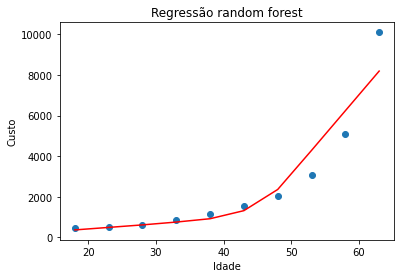

In [13]:
plt.scatter(x, y)
plt.plot(x, previsao, color='red')
plt.title('Regressão random forest')
plt.xlabel('Idade')
plt.ylabel('Custo')